<a href="https://colab.research.google.com/github/PouletteD/Proyecto-Final_DSI/blob/main/Proyecto_ParteIII_Donoso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis de Resultados de Prueba de Acceso a la Educación Superior en Chile


**Abstract**

El informe analiza los puntajes de la Prueba de Acceso a la Educación Superior (PAES) en Chile, evaluando cuatro hipótesis sobre el rendimiento académico por género y región.

La primera hipótesis, que sugiere que los hombres obtienen mejores resultados en matemáticas, fue confirmada, mostrando una diferencia promedio de 39 puntos a favor de los hombres.

La segunda hipótesis, que plantea que las mujeres superan a los hombres en la prueba de Lenguaje en la región de O'Higgins, no encontró diferencias estadísticamente significativas, aunque hubo una ligera ventaja para las mujeres.

La tercera hipótesis, que sostiene que los colegios particulares de Santiago obtienen mejores puntajes que los de otras regiones, no se confirmó, ya que la región Metropolitana mostró un rendimiento medio en comparación con otras regiones.

La cuarta hipótesis indica que existe una correlación importante entre el resultado de la prueba Matemáticas 1 y la prueba Matemáticas 2, que fue confirmada utilizando los métodos estadísticos necesarios.

Finalmente, y en base a los resultados obtenidos, se aplicó un modelo de Machine Learning para poder estimar el resultado de la prueba Matemáticas 1. Este modelo de regresión obtuvo un resultado estadístico regular, pero permite ser una buena base para análisis posteriores.

**Objetivo**



**Contexto Comercial**

In [1]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
import io

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PouletteD/Proyecto-Final_DSI/main/puntajes_paes.csv',delimiter=';')
df.head(5)

,MRUN,ANYO_PROCESO,COD_SEXO,NOMBRE_UNIDAD_EDUC,DEPENDENCIA,NOMBRE_REGION_EGRESO,NOMBRE_COMUNA_EGRESO,ANYO_DE_EGRESO,PTJE_NEM,PTJE_RANKING,CLEC_MAX,MATE1_MAX,MATE2_MAX,HCSOC_MAX,CIEN_MAX
0,6160406,2024,2,COMPLEJO EDUC.MUN. BRIGIDA WALKER.,1,REGION METROPOLITANA DE SANTIAGO,ÑUÑOA,1981,856,946,711,0,0,739,0
1,7259152,2024,2,FUNDACION DUOC,4,REGION METROPOLITANA DE SANTIAGO,SANTIAGO,1995,0,0,0,0,0,0,0
2,9774983,2024,1,CENTRO EDUCACIÓN ADULTOS PEDRO DE VALDIVIA,3,REGION DE VALPARAISO,SAN ANTONIO,2023,0,0,484,513,0,520,0
3,1085674,2024,2,,,,,1961,324,324,679,797,393,0,722
4,18615634,2024,2,LICEO DE NIÑAS,6,REGION DEL BIOBIO,CONCEPCION,1962,451,453,597,498,0,647,0


In [3]:
#Verificar tipo de dato identificado por python
df.dtypes

,0
MRUN,int64
ANYO_PROCESO,int64
COD_SEXO,int64
NOMBRE_UNIDAD_EDUC,object
DEPENDENCIA,object
NOMBRE_REGION_EGRESO,object
NOMBRE_COMUNA_EGRESO,object
ANYO_DE_EGRESO,object
PTJE_NEM,int64
PTJE_RANKING,int64


A continuación se corrigen los tipos de datos según la información contenida en el archivo "variables_paes_2024"

In [4]:
#Correción tipo de datos
df['MRUN'] = df['MRUN'].astype(str)
df['ANYO_PROCESO'] = pd.Categorical(df['ANYO_PROCESO'])
df['COD_SEXO'] = pd.Categorical(df['COD_SEXO'])
df['DEPENDENCIA'] = pd.Categorical(df['DEPENDENCIA'])
df['ANYO_DE_EGRESO'] = pd.Categorical(df['ANYO_DE_EGRESO'])
df['PTJE_NEM'] = df['PTJE_NEM'].astype(float)
df['PTJE_RANKING'] = df['PTJE_RANKING'].astype(float)
df['CLEC_MAX'] = df['CLEC_MAX'].astype(float)
df['MATE1_MAX'] = df['MATE1_MAX'].astype(float)
df['MATE2_MAX'] = df['MATE2_MAX'].astype(float)
df['HCSOC_MAX'] = df['HCSOC_MAX'].astype(float)
df['CIEN_MAX'] = df['CIEN_MAX'].astype(float)
print(df.dtypes)

MRUN                      object
ANYO_PROCESO            category
COD_SEXO                category
NOMBRE_UNIDAD_EDUC        object
DEPENDENCIA             category
NOMBRE_REGION_EGRESO      object
NOMBRE_COMUNA_EGRESO      object
ANYO_DE_EGRESO          category
PTJE_NEM                 float64
PTJE_RANKING             float64
CLEC_MAX                 float64
MATE1_MAX                float64
MATE2_MAX                float64
HCSOC_MAX                float64
CIEN_MAX                 float64
dtype: object


In [5]:
df.nunique()

,0
MRUN,309352
ANYO_PROCESO,1
COD_SEXO,4
NOMBRE_UNIDAD_EDUC,3550
DEPENDENCIA,7
NOMBRE_REGION_EGRESO,17
NOMBRE_COMUNA_EGRESO,332
ANYO_DE_EGRESO,59
PTJE_NEM,349
PTJE_RANKING,756


In [6]:
#eliminar filas con valores 3 y 4 de columna cod_sexo ya que no utlizaremos esos datos
df = df[df['COD_SEXO'] != 3]
df = df[df['COD_SEXO'] != 4]

In [7]:
df.nunique()

,0
MRUN,309350
ANYO_PROCESO,1
COD_SEXO,2
NOMBRE_UNIDAD_EDUC,3550
DEPENDENCIA,7
NOMBRE_REGION_EGRESO,17
NOMBRE_COMUNA_EGRESO,332
ANYO_DE_EGRESO,59
PTJE_NEM,349
PTJE_RANKING,756


In [8]:
#Definir variable cod_sexo
df['género'] = np.where(df['COD_SEXO'] == 1, 'Masculino', 'Femenino')
df.head()

,MRUN,ANYO_PROCESO,COD_SEXO,NOMBRE_UNIDAD_EDUC,DEPENDENCIA,NOMBRE_REGION_EGRESO,NOMBRE_COMUNA_EGRESO,ANYO_DE_EGRESO,PTJE_NEM,PTJE_RANKING,CLEC_MAX,MATE1_MAX,MATE2_MAX,HCSOC_MAX,CIEN_MAX,género
0,6160406,2024,2,COMPLEJO EDUC.MUN. BRIGIDA WALKER.,1,REGION METROPOLITANA DE SANTIAGO,ÑUÑOA,1981,856.0,946.0,711.0,0.0,0.0,739.0,0.0,Femenino
1,7259152,2024,2,FUNDACION DUOC,4,REGION METROPOLITANA DE SANTIAGO,SANTIAGO,1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Femenino
2,9774983,2024,1,CENTRO EDUCACIÓN ADULTOS PEDRO DE VALDIVIA,3,REGION DE VALPARAISO,SAN ANTONIO,2023,0.0,0.0,484.0,513.0,0.0,520.0,0.0,Masculino
3,1085674,2024,2,,,,,1961,324.0,324.0,679.0,797.0,393.0,0.0,722.0,Femenino
4,18615634,2024,2,LICEO DE NIÑAS,6,REGION DEL BIOBIO,CONCEPCION,1962,451.0,453.0,597.0,498.0,0.0,647.0,0.0,Femenino


In [9]:
#Definir variables dependencia
mapeo = {'1': 'Corporación Municipal',
    '2': 'Municipal',
    '3': 'Particular Subvencionado',
    '4': 'Particular Pagado',
    '5': 'Corporación de Administración Delegada',
    '6': 'Servicio Local de Educación'}

In [10]:
# Crear una nueva columna
df['tipo_dependencia'] = df['DEPENDENCIA'].map(mapeo)
df.head()

,MRUN,ANYO_PROCESO,COD_SEXO,NOMBRE_UNIDAD_EDUC,DEPENDENCIA,NOMBRE_REGION_EGRESO,NOMBRE_COMUNA_EGRESO,ANYO_DE_EGRESO,PTJE_NEM,PTJE_RANKING,CLEC_MAX,MATE1_MAX,MATE2_MAX,HCSOC_MAX,CIEN_MAX,género,tipo_dependencia
0,6160406,2024,2,COMPLEJO EDUC.MUN. BRIGIDA WALKER.,1,REGION METROPOLITANA DE SANTIAGO,ÑUÑOA,1981,856.0,946.0,711.0,0.0,0.0,739.0,0.0,Femenino,Corporación Municipal
1,7259152,2024,2,FUNDACION DUOC,4,REGION METROPOLITANA DE SANTIAGO,SANTIAGO,1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Femenino,Particular Pagado
2,9774983,2024,1,CENTRO EDUCACIÓN ADULTOS PEDRO DE VALDIVIA,3,REGION DE VALPARAISO,SAN ANTONIO,2023,0.0,0.0,484.0,513.0,0.0,520.0,0.0,Masculino,Particular Subvencionado
3,1085674,2024,2,,,,,1961,324.0,324.0,679.0,797.0,393.0,0.0,722.0,Femenino,NaN
4,18615634,2024,2,LICEO DE NIÑAS,6,REGION DEL BIOBIO,CONCEPCION,1962,451.0,453.0,597.0,498.0,0.0,647.0,0.0,Femenino,Servicio Local de Educación


In [46]:
#Eliminar filas con valores nulos para contar solo con resultados de alumnos que rindieron todas las pruebas
df = df.dropna()
df.head()

,MRUN,ANYO_PROCESO,COD_SEXO,NOMBRE_UNIDAD_EDUC,DEPENDENCIA,NOMBRE_REGION_EGRESO,NOMBRE_COMUNA_EGRESO,ANYO_DE_EGRESO,PTJE_NEM,PTJE_RANKING,...,Matemáticas2,Historia,Ciencias,género,tipo_dependencia,región_código,género_código,dependencia_código,rango_puntaje_M1,rango_M1_codigo
14,14080890,2024,1,INTERNADO NACIONAL BARROS ARANA,2,Metropolitana,SANTIAGO,1967,493.0,501.0,...,452.0,814.0,676.0,Masculino,Municipal,11,1,1.0,Medio,2
61,12425693,2024,1,LICEO BICENTENARIO TÉCNICO PROFESIONAL IGNACIO...,5,Metropolitana,RECOLETA,1975,582.0,605.0,...,569.0,804.0,611.0,Masculino,Corporación de Administración Delegada,11,1,2.0,Alto,0
81,7608500,2024,1,COLEGIO DE ADULTOS CARELMAPU DE CONCHALI,3,Metropolitana,CONCHALI,2023,618.0,660.0,...,393.0,424.0,415.0,Masculino,Particular Subvencionado,11,1,2.0,Bajo,1
87,16096205,2024,1,LICEO JAVIERA CARRERA,2,Metropolitana,SANTIAGO,1976,378.0,447.0,...,424.0,624.0,430.0,Masculino,Municipal,11,1,1.0,Bajo,1
139,480029,2024,1,LICEO JUAN GOMEZ MILLAS,2,Metropolitana,EL BOSQUE,2023,915.0,983.0,...,366.0,595.0,416.0,Masculino,Municipal,11,1,1.0,Bajo,1


In [47]:
# Cambiar el nombre de múltiples columnas
df = df.rename(columns={
    'CLEC_MAX': 'Lenguaje',
    'MATE1_MAX': 'Matemáticas1',
    'MATE2_MAX': 'Matemáticas2',
    'HCSOC_MAX': 'Historia',
    'CIEN_MAX': 'Ciencias'})

In [48]:
#Reemplazo valores 0 en puntajes por Nan
df.loc[:, ['Matemáticas1', 'Matemáticas2', 'Lenguaje', 'Ciencias', 'Historia']] = df.loc[:, ['Matemáticas1', 'Matemáticas2', 'Lenguaje', 'Ciencias', 'Historia']].replace(0, np.nan)

In [49]:
# Reemplazar los valores específicos en la columna 'NOMBRE_REGION_EGRESO'
df['NOMBRE_REGION_EGRESO'] = df['NOMBRE_REGION_EGRESO'].replace({
    'REGION DE VALPARAISO': 'Valparaiso',
    'REGION METROPOLITANA DE SANTIAGO': 'Metropolitana',
    'REGION DE TARAPACA': 'Tarapaca',
    'REGION DE LOS LAGOS': 'Los Lagos',
    'REGION DEL MAULE': 'Maule',
    'REGION DEL LIBERTADOR GENERAL BERNARDO O\'HIGGINS': 'O\'Higgins',
    'REGION DE ARICA Y PARINACOTA': 'Arica y Parinacota',
    'REGION DE LA ARAUCANIA': 'Araucanía',
    'REGION AISEN DEL GENERAL CARLOS IBAÑEZ DEL CAMPO': 'Aysén',
    'REGION DE ANTOFAGASTA': 'Antofagasta',
    'REGION DE COQUIMBO': 'Coquimbo',
    'REGION DEL BIOBIO': 'Biobío',
    'REGION DE ÑUBLE': 'Ñuble',
    'REGION DE ATACAMA': 'Atacama',
    'REGION DE LOS RIOS': 'Los Ríos',
    'REGION DE MAGALLANES Y DE LA ANTARTICA CHILENA': 'Magallanes'})

**Hipotesis 1**

 Los hombres obtienen un mejor puntaje que las mujeres en la prueba de matemáticas


In [50]:
#conteo de hombres y mujeres
conteo_genero = df['género'].value_counts()


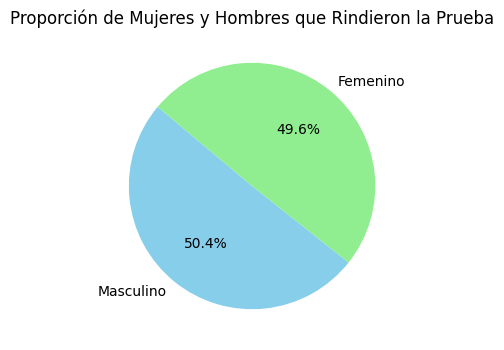

In [51]:
#crear gráfico de torta
plt.figure(figsize=(4, 4))
#editar colores
plt.pie(conteo_genero, labels=conteo_genero.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
#poner título
plt.title('Proporción de Mujeres y Hombres que Rindieron la Prueba')

plt.show()

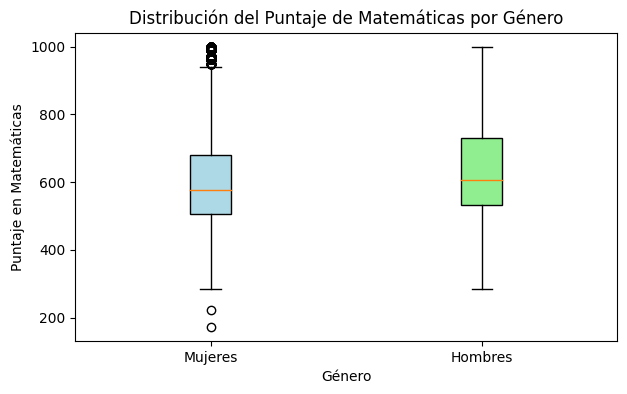

In [52]:
#crear gráfico de caja
df_mat1 = df.dropna(subset=['Matemáticas1'])

plt.figure(figsize=(7, 4))
boxplot = plt.boxplot(
    [df_mat1[df_mat1['género'] == 'Femenino']['Matemáticas1'],
     df_mat1[df_mat1['género'] == 'Masculino']['Matemáticas1']],
    labels=['Mujeres', 'Hombres'],
    patch_artist=True)
#editar colores
colors = ['lightblue', 'lightgreen']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
#títulos y nombre de ejes
plt.title('Distribución del Puntaje de Matemáticas por Género')
plt.xlabel('Género')
plt.ylabel('Puntaje en Matemáticas')

plt.show()

El gráfico sugiere que, si bien existen algunas diferencias en la distribución de los puntajes entre hombres y mujeres, estas diferencias no son muy marcadas en términos del puntaje promedio. Sin embargo, es importante considerar la mayor dispersión en los resultados de los hombres y la presencia de valores atípicos en ambos grupos.

A continuación se mostrará un gráfico con el promedio de puntaje de hombres y mujeres en la prueba de matemáticas para poder sacar conclusiones más claras.

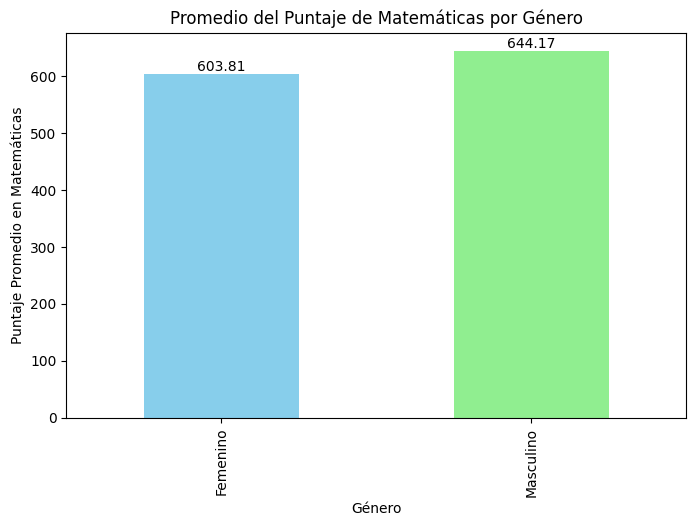

In [53]:
#calcular promedio por género para matemáticas 1
promedios = df.groupby('género')['Matemáticas1'].mean()

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
promedios.plot(kind='bar', color=['skyblue', 'lightgreen'])
#agregar título y nombre a los ejes
plt.title('Promedio del Puntaje de Matemáticas por Género')
plt.xlabel('Género')
plt.ylabel('Puntaje Promedio en Matemáticas')
#redondear el promedio a 2 decimales
for i, valor in enumerate(promedios):
    plt.text(i, valor + 5, round(valor, 2), ha='center')

plt.show()

Al analizar este gráfico se puede observar que si existe una diferencia importante en el puntaje de hombres y mujeres en la prueba de matemáticas. Pese a que en el gráfico anterior observamos que las mujeres presentan una mayor diversidad en los puntajes obteniendo más cantidad de altos y más cantidad de bajos puntajes que los hombres y que se observan más outliers en la distribución de puntajes de mujeres especialmente en los puntajes más altos demostrando que hay un grupo que se escapa del resto podemos concluir que si hay una diferencias significativa entre los puntajes dependiendo del género de los individuos específicamente en la prueba de matemáticas por lo que nuestra hipótesis sería verdadera.

**Hipotesis 2**

Las mujeres obtienen mejor puntaje que los hombres en la prueba de Lenguaje en la región de O'Higgins

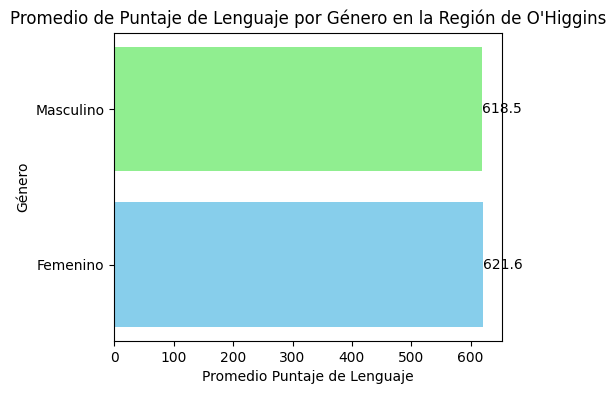

In [54]:
#Crear gráfico de barras horizontales
df_ohiggins = df[df['NOMBRE_REGION_EGRESO'] == "O'Higgins"]
#calcular promedio por género en región de O'Higgins
promedios = df_ohiggins.groupby('género')['Lenguaje'].mean()
#cambiar colores
fig, ax = plt.subplots(figsize=(5, 4))
bars = ax.barh(promedios.index, promedios.values, color=['skyblue', 'lightgreen'])
#título y nombre de cada barra
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.1f}',
            va='center', ha='left')
ax.set_xlabel('Promedio Puntaje de Lenguaje')
ax.set_ylabel('Género')
ax.set_title('Promedio de Puntaje de Lenguaje por Género en la Región de O\'Higgins')

plt.show()

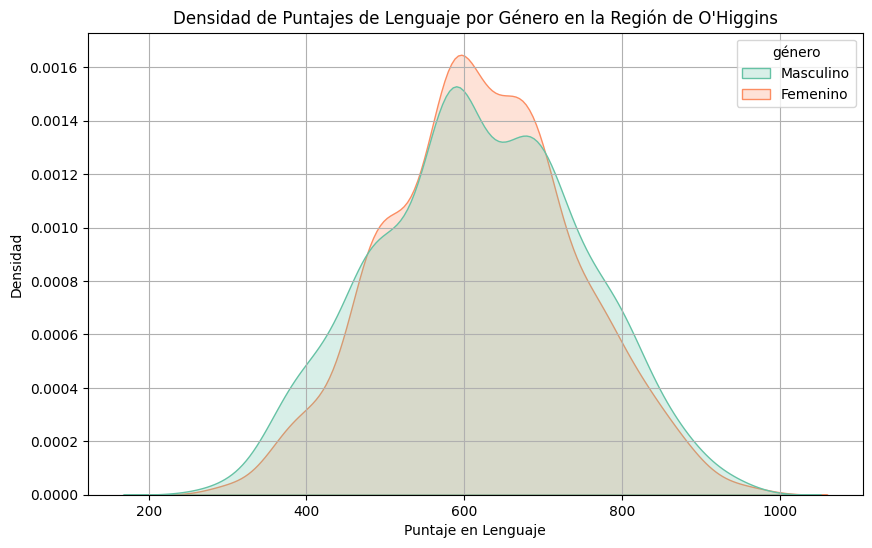

In [55]:
#crear gráfico de densidad
ohiggins_data = df[df['NOMBRE_REGION_EGRESO'] == "O'Higgins"]

plt.figure(figsize=(10, 6))

sns.kdeplot(data=ohiggins_data, x='Lenguaje', hue='género', fill=True, palette='Set2')

plt.title("Densidad de Puntajes de Lenguaje por Género en la Región de O'Higgins")
plt.xlabel("Puntaje en Lenguaje")
plt.ylabel("Densidad")
plt.grid(True)

plt.show()

A partir de ambos gráficos podemos concluir que no existen grandes diferencias en el promedio en la prueba de lenguaje entre mujeres y hombres en la región de O'Higgins, además podemos observar que la curva de las mujeres parece ser ligeramente más ancha que la de los hombres, lo que indica que los puntajes de las mujeres presentan una mayor dispersión. Es decir, hay más variabilidad en los resultados de las mujeres, con algunas obteniendo puntajes mucho más altos o más bajos que el promedio. Para poder hacer un análisis más a fondo de esto tendriamos que involucrar más factores que no tenemos en nuestra base por lo que por el momento se rechaza esta hipótesis.

**Hipotesis 3**

Los colegios particulares de Santiago obtienen mejores puntajes que los colegios particulares de otras regiones

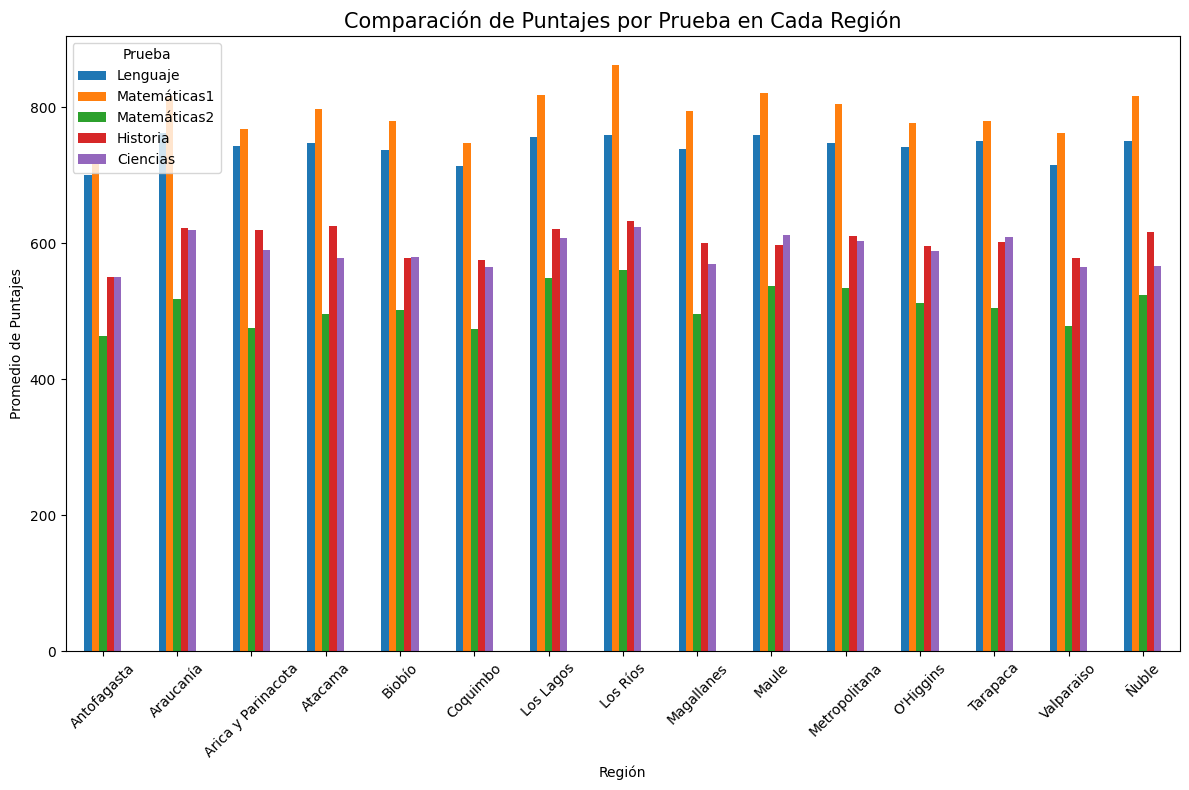

In [56]:
# Gráfico de barras
df_particular_pagado = df[df['tipo_dependencia'] == 'Particular Pagado']

promedios_por_region = df_particular_pagado.groupby('NOMBRE_REGION_EGRESO')[['Lenguaje', 'Matemáticas1', 'Matemáticas2', 'Historia', 'Ciencias']].mean()
#creación del gráfico
fig, ax = plt.subplots(figsize=(12, 8))

promedios_por_region.plot(kind='bar', ax=ax)
#título y nombre de ejes
ax.set_title('Comparación de Puntajes por Prueba en Cada Región', size=15)
ax.set_xlabel('Región')
ax.set_ylabel('Promedio de Puntajes')
ax.legend(title='Prueba')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-57-5ed15494546f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_particular_pagado.loc[:,'Promedio_Combinado'] = df_particular_pagado[['Lenguaje', 'Matemáticas1', 'Matemáticas2']].mean(axis=1)


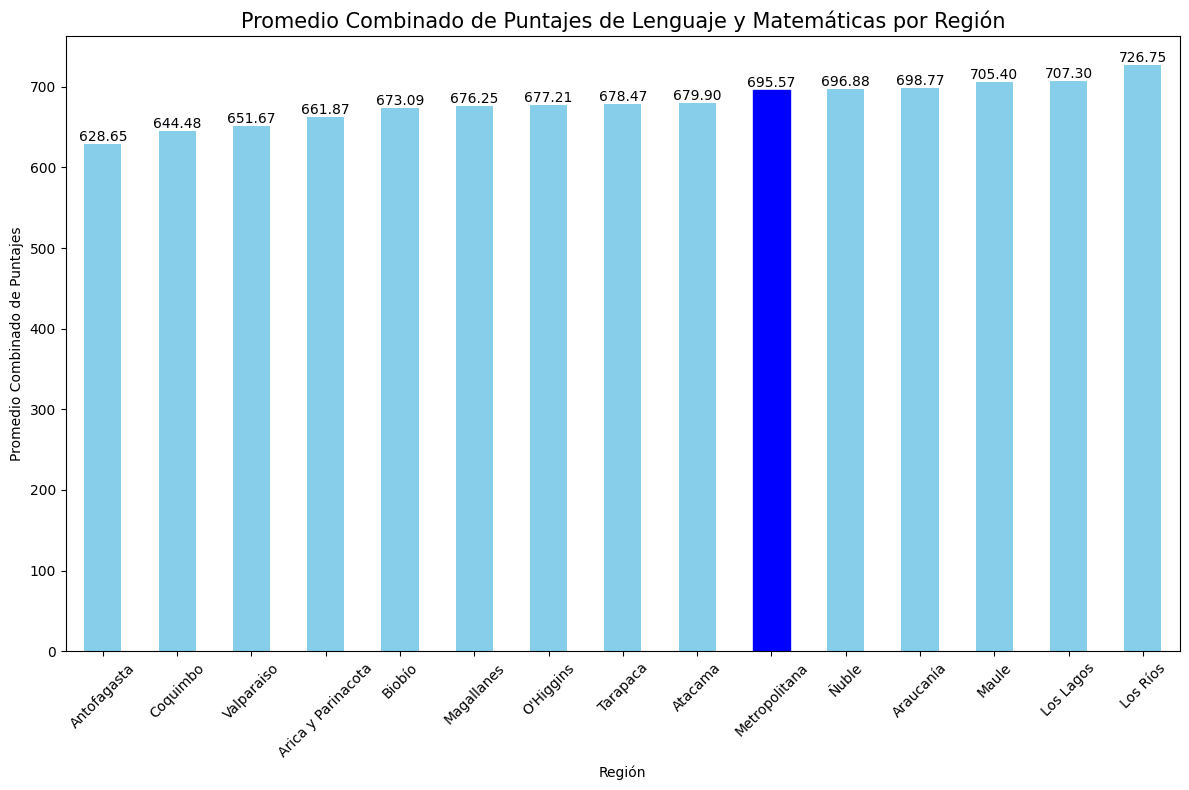

In [57]:
# Grafico de barras por promedio de cada región
df_particular_pagado.loc[:,'Promedio_Combinado'] = df_particular_pagado[['Lenguaje', 'Matemáticas1', 'Matemáticas2']].mean(axis=1)
#calcular promedio por región
promedios_por_region = df_particular_pagado.groupby('NOMBRE_REGION_EGRESO')['Promedio_Combinado'].mean()

promedios_por_region = promedios_por_region.sort_values()
#creación de gráfico
fig, ax = plt.subplots(figsize=(12, 8))
#cambiar colores
barras = promedios_por_region.plot(kind='bar', ax=ax, color='skyblue')
#dejar región metropolitana de otro color
nombre_region_objetivo = 'Metropolitana'
color_objetivo = 'blue'

for barra in barras.patches:
    if barra.get_x() == barras.patches[promedios_por_region.index.get_loc(nombre_region_objetivo)].get_x():
        barra.set_color(color_objetivo)
#titulo y etiqueta de los ejes
ax.set_title('Promedio Combinado de Puntajes de Lenguaje y Matemáticas por Región', size=15)
ax.set_xlabel('Región')
ax.set_ylabel('Promedio Combinado de Puntajes')
ax.set_xticks(range(len(promedios_por_region.index)))
ax.set_xticklabels(promedios_por_region.index, rotation=45)
#añadir etiqueda de de datos en cada barra
for barra in barras.patches:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2,
        altura,
        f'{altura:.2f}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black')

plt.tight_layout()
plt.show()

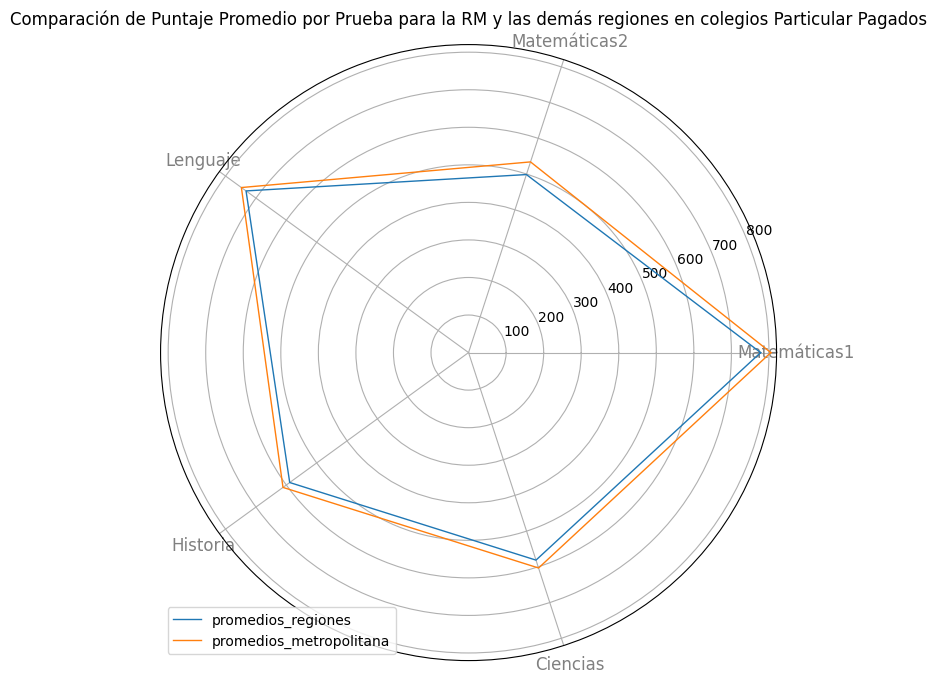

In [58]:

# Extraer las pruebas y promedios
pruebas = ['Matemáticas1', 'Matemáticas2', 'Lenguaje', 'Historia','Ciencias']
n_categorias = len(pruebas)

#Promedios otras regiones
df_regiones=df_particular_pagado[df_particular_pagado['NOMBRE_REGION_EGRESO']!='Metropolitana']

df_puntajes_regiones = df_regiones[pruebas]


promedios_regiones = df_puntajes_regiones.mean()
promedios_regiones=list(promedios_regiones)
promedios_regiones += promedios_regiones[:1]

#Promedios región metropolitana
df_metropolitana=df_particular_pagado[df_particular_pagado['NOMBRE_REGION_EGRESO']=='Metropolitana']

df_puntajes_metropolitana = df_metropolitana[pruebas]

promedios_metropolitana = df_puntajes_metropolitana.mean()
promedios_metropolitana=list(promedios_metropolitana)
promedios_metropolitana += promedios_metropolitana[:1]

# Ángulo de cada categoría en el gráfico (dividido en 2 pi)
angulos = [i/n_categorias* 2 * np.pi for i in range(n_categorias)]
angulos += angulos[:1]  # Para cerrar el círculo

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(8,8),
                    subplot_kw=dict(polar=True))

plt.xticks(angulos[:-1],pruebas,color='gray',size=12)

ax.plot(angulos,promedios_regiones,linewidth=1,linestyle='solid')
#ax.fill(angulos,promedios_regiones,'skyblue',alpha=0.4) #utilizar si se quiere pintar el interior

ax.plot(angulos,promedios_metropolitana,linewidth=1,linestyle='solid')
#ax.fill(angulos,promedios_metropolitana,'red',alpha=0.1)

plt.title('Comparación de Puntaje Promedio por Prueba para la RM y las demás regiones en colegios Particular Pagados')
plt.legend(labels=('promedios_regiones','promedios_metropolitana'),loc='lower left')

A partir de los gráficos realizados anteriormente podemos concluir que no existe una gran diferencia entre promedio de cada prueba de la región Metropolitana con el resto de las regiones, al calcular el promedio de todas las pruebas en cada región vemos que la región metropolitana queda al centro como podemos verlo en el segundo gráfico. Y al ver el promedio de Santiago vs las otras regiones podemos observar que la Región Metropolitana es superior en todas las pruebas pero no de manera significativa. Se ve que en matemáticas 1 y matemáticas 2 la diferencia es un poco mayor pero a partir de esto tampoco podriamos afirmar que realmente la Región Metropolitana tenga puntajes superiores por lo cúal se rechaza esta hipótesis.

**Hipótesis 4**

Existe una alta correlación positiva entre los resultados en la prueba de matemáticas 1 y matemáticas 2, es decir, al estudiante que le va bien en una le va bien en ambas.

<ipython-input-113-f220aec4d3b2>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(data=df, x="Matemáticas1", y="Matemáticas2",kind="scatter",palette='coolwarm')


<Figure size 1400x600 with 0 Axes>

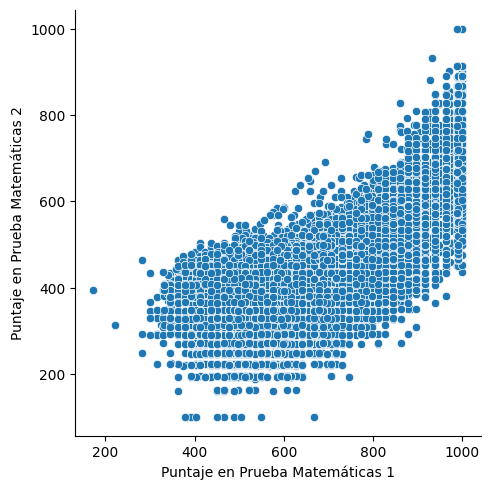

In [113]:
#Para evaluar esta hipótesis, realizaremos un gráfico de dispersión que nos permita medir gráficamente la relación entre ambas variables

plt.figure(figsize=(14, 6))
sns.relplot(data=df, x="Matemáticas1", y="Matemáticas2",kind="scatter",palette='coolwarm')
plt.xlabel('Puntaje en Prueba Matemáticas 1')
plt.ylabel('Puntaje en Prueba Matemáticas 2')
plt.show()

De manera gráfica, podemos ver que existe una correlación positiva entre los resultados de ambas pruebas. Para confirmar esto realizaremos el cálculo del indice de correlación de Pearson.

In [114]:
#Calculo indice de correlación de Pearson entre Matemáticas 1 y Matemáticas 2
correlacion = df['Matemáticas1'].corr(df['Matemáticas2'])
print(f'Índice de Correlación: {correlacion}')

Índice de Correlación: 0.7058432120019409


Considerando la gráfica y el índice de correlación obtenido (mayor a 0 y cercano a 1) se puede concluir que existe una fuerte correlación positiva entre ambas variables.

#Modelo de Machine Learning



Para la aplicación de un modelo de Machine Learning, utilizaré la metodología de regresión lineal para estimar el resultado de la prueba Matemáticas 1, en base a distintas variables independientes como el género, dependencia del colegio, notas de enseñanza media y el resultado de su prueba Matemáticas 2 y Lenguaje. La hipótesis será que el modelo permitirá estimar de forma contundente el resultado en la variable independiente.

In [59]:
#Confirmar que no existen valores nulos en el dataset ya que la limpieza la realicé para la entrega anterior
df.isnull().sum().sort_values(ascending=False)

,0
MRUN,0
ANYO_PROCESO,0
rango_puntaje_M1,0
dependencia_código,0
género_código,0
región_código,0
tipo_dependencia,0
género,0
Ciencias,0
Historia,0


In [60]:
#importar librerias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

Primero realizaré la codificación de las variables categóricas que se utilizarán en el modelo:

In [115]:
#Variable Región
df['NOMBRE_REGION_EGRESO'] = df['NOMBRE_REGION_EGRESO'].astype(str)

label_encoder = LabelEncoder()

df['región_código'] = label_encoder.fit_transform(df['NOMBRE_REGION_EGRESO'])

df

,MRUN,ANYO_PROCESO,COD_SEXO,NOMBRE_UNIDAD_EDUC,DEPENDENCIA,NOMBRE_REGION_EGRESO,NOMBRE_COMUNA_EGRESO,ANYO_DE_EGRESO,PTJE_NEM,PTJE_RANKING,...,Matemáticas2,Historia,Ciencias,género,tipo_dependencia,región_código,género_código,dependencia_código,rango_puntaje_M1,rango_M1_codigo
14,14080890,2024,1,INTERNADO NACIONAL BARROS ARANA,2,Metropolitana,SANTIAGO,1967,493.0,501.0,...,452.0,814.0,676.0,Masculino,Municipal,11,1,1.0,Medio,2
61,12425693,2024,1,LICEO BICENTENARIO TÉCNICO PROFESIONAL IGNACIO...,5,Metropolitana,RECOLETA,1975,582.0,605.0,...,569.0,804.0,611.0,Masculino,Corporación de Administración Delegada,11,1,2.0,Alto,0
81,7608500,2024,1,COLEGIO DE ADULTOS CARELMAPU DE CONCHALI,3,Metropolitana,CONCHALI,2023,618.0,660.0,...,393.0,424.0,415.0,Masculino,Particular Subvencionado,11,1,2.0,Bajo,1
87,16096205,2024,1,LICEO JAVIERA CARRERA,2,Metropolitana,SANTIAGO,1976,378.0,447.0,...,424.0,624.0,430.0,Masculino,Municipal,11,1,1.0,Bajo,1
139,480029,2024,1,LICEO JUAN GOMEZ MILLAS,2,Metropolitana,EL BOSQUE,2023,915.0,983.0,...,366.0,595.0,416.0,Masculino,Municipal,11,1,1.0,Bajo,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309305,25506440,2024,1,LICEO COMERCIAL DEL DESARROLLO,3,Araucanía,TEMUCO,2023,729.0,777.0,...,366.0,384.0,398.0,Masculino,Particular Subvencionado,1,1,2.0,Bajo,1
309314,25963427,2024,1,COMPLEJO EDUCACIONAL J. MIGUEL CARRERA,2,Metropolitana,QUILICURA,2023,686.0,721.0,...,346.0,393.0,389.0,Masculino,Municipal,11,1,1.0,Bajo,1
309339,26266497,2024,2,LICEO JOSE ABELARDO NUÑEZ Nº 4,3,Metropolitana,HUECHURABA,2023,865.0,886.0,...,328.0,402.0,389.0,Femenino,Particular Subvencionado,11,0,2.0,Bajo,1
309341,26498517,2024,1,LICEO AVENIDA RECOLETA,3,Metropolitana,RECOLETA,2023,828.0,847.0,...,290.0,654.0,389.0,Masculino,Particular Subvencionado,11,1,2.0,Bajo,1


In [116]:
#Variable Género
df['género'] = df['género'].astype(str)

label_encoder = LabelEncoder()

df['género_código'] = label_encoder.fit_transform(df['género'])

df

,MRUN,ANYO_PROCESO,COD_SEXO,NOMBRE_UNIDAD_EDUC,DEPENDENCIA,NOMBRE_REGION_EGRESO,NOMBRE_COMUNA_EGRESO,ANYO_DE_EGRESO,PTJE_NEM,PTJE_RANKING,...,Matemáticas2,Historia,Ciencias,género,tipo_dependencia,región_código,género_código,dependencia_código,rango_puntaje_M1,rango_M1_codigo
14,14080890,2024,1,INTERNADO NACIONAL BARROS ARANA,2,Metropolitana,SANTIAGO,1967,493.0,501.0,...,452.0,814.0,676.0,Masculino,Municipal,11,1,1.0,Medio,2
61,12425693,2024,1,LICEO BICENTENARIO TÉCNICO PROFESIONAL IGNACIO...,5,Metropolitana,RECOLETA,1975,582.0,605.0,...,569.0,804.0,611.0,Masculino,Corporación de Administración Delegada,11,1,2.0,Alto,0
81,7608500,2024,1,COLEGIO DE ADULTOS CARELMAPU DE CONCHALI,3,Metropolitana,CONCHALI,2023,618.0,660.0,...,393.0,424.0,415.0,Masculino,Particular Subvencionado,11,1,2.0,Bajo,1
87,16096205,2024,1,LICEO JAVIERA CARRERA,2,Metropolitana,SANTIAGO,1976,378.0,447.0,...,424.0,624.0,430.0,Masculino,Municipal,11,1,1.0,Bajo,1
139,480029,2024,1,LICEO JUAN GOMEZ MILLAS,2,Metropolitana,EL BOSQUE,2023,915.0,983.0,...,366.0,595.0,416.0,Masculino,Municipal,11,1,1.0,Bajo,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309305,25506440,2024,1,LICEO COMERCIAL DEL DESARROLLO,3,Araucanía,TEMUCO,2023,729.0,777.0,...,366.0,384.0,398.0,Masculino,Particular Subvencionado,1,1,2.0,Bajo,1
309314,25963427,2024,1,COMPLEJO EDUCACIONAL J. MIGUEL CARRERA,2,Metropolitana,QUILICURA,2023,686.0,721.0,...,346.0,393.0,389.0,Masculino,Municipal,11,1,1.0,Bajo,1
309339,26266497,2024,2,LICEO JOSE ABELARDO NUÑEZ Nº 4,3,Metropolitana,HUECHURABA,2023,865.0,886.0,...,328.0,402.0,389.0,Femenino,Particular Subvencionado,11,0,2.0,Bajo,1
309341,26498517,2024,1,LICEO AVENIDA RECOLETA,3,Metropolitana,RECOLETA,2023,828.0,847.0,...,290.0,654.0,389.0,Masculino,Particular Subvencionado,11,1,2.0,Bajo,1


In [118]:
#Para la variable dependencia, se realizará una agrupación debido a juicio experto, que permite clasificar los colegios en 3 categorías principales.
#1: Colegios de administración estatal
#2: Colegios de administración delegada/subvencionada
#3: Colegios particulares

mapeo = {'1': '1',
    '2': '1',
    '3': '2',
    '4': '3',
    '5': '2',
    '6': '1'}

df['dependencia_código'] = df['DEPENDENCIA'].map(mapeo)
df['dependencia_código'] =df['dependencia_código'].astype(float)
df.head()

,MRUN,ANYO_PROCESO,COD_SEXO,NOMBRE_UNIDAD_EDUC,DEPENDENCIA,NOMBRE_REGION_EGRESO,NOMBRE_COMUNA_EGRESO,ANYO_DE_EGRESO,PTJE_NEM,PTJE_RANKING,...,Matemáticas2,Historia,Ciencias,género,tipo_dependencia,región_código,género_código,dependencia_código,rango_puntaje_M1,rango_M1_codigo
14,14080890,2024,1,INTERNADO NACIONAL BARROS ARANA,2,Metropolitana,SANTIAGO,1967,493.0,501.0,...,452.0,814.0,676.0,Masculino,Municipal,11,1,1.0,Medio,2
61,12425693,2024,1,LICEO BICENTENARIO TÉCNICO PROFESIONAL IGNACIO...,5,Metropolitana,RECOLETA,1975,582.0,605.0,...,569.0,804.0,611.0,Masculino,Corporación de Administración Delegada,11,1,2.0,Alto,0
81,7608500,2024,1,COLEGIO DE ADULTOS CARELMAPU DE CONCHALI,3,Metropolitana,CONCHALI,2023,618.0,660.0,...,393.0,424.0,415.0,Masculino,Particular Subvencionado,11,1,2.0,Bajo,1
87,16096205,2024,1,LICEO JAVIERA CARRERA,2,Metropolitana,SANTIAGO,1976,378.0,447.0,...,424.0,624.0,430.0,Masculino,Municipal,11,1,1.0,Bajo,1
139,480029,2024,1,LICEO JUAN GOMEZ MILLAS,2,Metropolitana,EL BOSQUE,2023,915.0,983.0,...,366.0,595.0,416.0,Masculino,Municipal,11,1,1.0,Bajo,1


In [120]:
#Ahora se define el conjunto de variables independientes ya codificadas.
X=df[['PTJE_NEM','PTJE_RANKING','Matemáticas2','Lenguaje','región_código','género_código','dependencia_código']]
X

,PTJE_NEM,PTJE_RANKING,Matemáticas2,Lenguaje,región_código,género_código,dependencia_código
14,493.0,501.0,452.0,747.0,11,1,1.0
61,582.0,605.0,569.0,742.0,11,1,2.0
81,618.0,660.0,393.0,496.0,11,1,2.0
87,378.0,447.0,424.0,475.0,11,1,1.0
139,915.0,983.0,366.0,378.0,11,1,1.0
...,...,...,...,...,...,...,...
309305,729.0,777.0,366.0,423.0,1,1,2.0
309314,686.0,721.0,346.0,375.0,11,1,1.0
309339,865.0,886.0,328.0,534.0,11,0,2.0
309341,828.0,847.0,290.0,651.0,11,1,2.0


In [121]:
#Se define la variable independiente Matematicas 1
y=df['Matemáticas1']
y

,Matemáticas1
14,711.0
61,830.0
81,478.0
87,585.0
139,450.0
...,...
309305,563.0
309314,523.0
309339,593.0
309341,585.0


In [123]:
#Se define el grupo de entrenamiento y testeo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [124]:
#Se aplica el modelo de regresión lineal

from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [125]:
y_pred = model.predict(X_test)
y_pred

array([599.79252359, 638.74627263, 515.86926902, ..., 554.12705907,
       462.22503843, 536.62421402])

Ahora se realizará la evaluación del modelo aplicado.

In [126]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')

# Calcular el R² Score (coeficiente de determinación)
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Error Cuadrático Medio (MSE): 6399.3896318801235
R² Score: 0.685091929523876


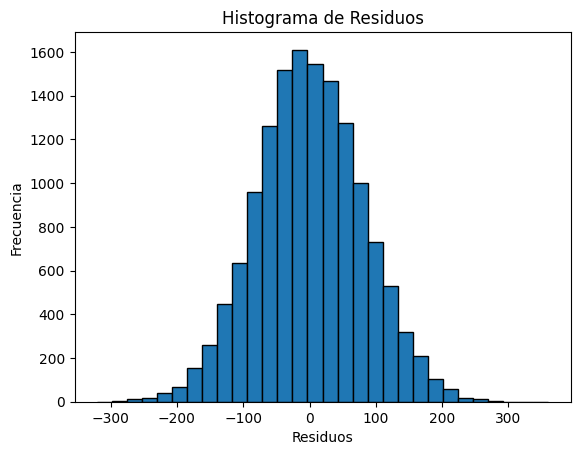

In [127]:
#Se realizará una gráfica de residuos para ver gráficamente el resultado del modelo

residuos = y_test - y_pred


plt.hist(residuos, bins=30, edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

**Conclusiones**

El modelo explica el 68.5% de la variabilidad en los resultados de la prueba de Matemáticas 1 a partir de las variables independientes utilizadas. Esto indica que una parte significativa del rendimiento en la prueba de Matemáticas 1 está asociada a las variables predictoras seleccionadas, pero aún queda un 31.5% de la variabilidad no explicada por el modelo, lo que sugiere que hay otros factores importantes que no han sido incluidos.

R² de 0.685 es un resultado moderado, lo que indica que el modelo captura bastante bien la relación entre las variables, aunque no de forma perfecta.
Las variables como PTJE_NEM y PTJE_RANKING suelen ser buenos predictores del rendimiento académico, lo que probablemente contribuyó de manera significativa a la explicación de la variabilidad en los puntajes de Matemáticas 1.
Puntaje de Lenguaje y Matemáticas 2 probablemente estén correlacionados con Matemáticas 1, lo que refuerza el modelo, ya que todas son medidas de habilidades cognitivas similares.
La inclusión de género, la región y la dependencia del colegio puede estar aportando información adicional relevante para capturar variaciones específicas de contexto socioeducativo.

Aunque el R² es razonable, el modelo podría mejorarse incluyendo otras variables importantes que pueden influir en el rendimiento en matemáticas, como el entorno familiar, la preparación específica en matemáticas, o aspectos socioeconómicos, que no son parte del dataset estudiado.

En resumen, el modelo es moderadamente bueno en explicar los resultados de la prueba de Matemáticas 1, pero todavía hay espacio para mejorar.